In [109]:
import pandas as pd
from pathlib import Path
import numpy as np
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv, find_dotenv
from panel.interact import interact
from datetime import datetime
from pandas import DataFrame



In [2]:
# Import and read csv files
silver=Path('../practice_merge/silver_nasdaq.csv')
silver_df=pd.read_csv(silver, parse_dates=True, index_col="Date", infer_datetime_format = True)

#count nulls
silver_df.isnull().mean()
silver_df.isnull().sum()

Close/Last    0
Volume        9
Open          0
High          0
Low           0
dtype: int64

In [3]:
#drop nulls
silver_df.dropna(inplace=True)
silver_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-29,25.901,71600.0,26.235,26.235,25.580
2021-06-28,26.254,39778.0,26.220,26.335,25.875
2021-06-25,26.126,30865.0,26.055,26.415,26.010
2021-06-24,26.089,24656.0,25.980,26.280,25.905
2021-06-23,26.152,22485.0,25.890,26.410,25.850


In [4]:
silver_df.pct_change().dropna(inplace=True)
#silver_df.head()

In [5]:
#read gold data
gold=Path('../practice_merge/gold_nasdaq.csv')
gold_df=pd.read_csv(gold,  parse_dates=True, index_col="Date", infer_datetime_format = True)


#count nulls
gold_df.isnull().mean()
gold_df.isnull().sum()


Close/Last    0
Volume        3
Open          0
High          0
Low           0
dtype: int64

In [6]:
# Drop nulls
gold_df.dropna(inplace=True)
gold_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-29,1763.6,232701.0,1778.8,1779.2,1750.1
2021-06-28,1780.7,158467.0,1782.0,1786.1,1770.4
2021-06-25,1777.8,158121.0,1775.7,1791.0,1773.6
2021-06-24,1776.7,148872.0,1778.2,1788.6,1772.7
2021-06-23,1783.4,175084.0,1779.1,1795.6,1773.1


In [7]:
# Read Platinum data
platinum=Path('../practice_merge/platinum_nasdaq.csv')
platinum_df=pd.read_csv(platinum,  parse_dates=True, index_col="Date", infer_datetime_format = True)

#count nulls 
platinum_df.isnull().mean()
platinum_df.isnull().sum()

Close/Last     0
Volume        58
Open           0
High           0
Low            0
dtype: int64

In [8]:
#drop nulls

platinum_df.dropna(inplace=True)
platinum_df.isnull().sum()

Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [9]:
# grab the date and close columns for each

Gold=gold_df.loc[:,['Close/Last','Volume']]
Silver=silver_df.loc[:,['Close/Last','Volume']]
Platinum=platinum_df.loc[:,['Close/Last','Volume']]

In [10]:
#concat the three graphs
precious_metals=pd.concat([Gold,Silver,Platinum],axis='columns',join='inner')
precious_metals.tail()

,Close/Last,Volume,Close/Last,Volume,Close/Last,Volume
Date,,,,,,
2016-07-06,1367.1,226256.0,20.203,76564.0,1091.3,16058.0
2016-07-05,1358.7,337002.0,19.907,169563.0,1076.9,24558.0
2016-07-01,1339.0,63821.0,19.588,25064.0,1057.1,3323.0
2016-06-30,1320.6,182812.0,18.582,54738.0,1024.3,13365.0
2016-06-29,1326.9,164974.0,18.362,86786.0,1013.5,22729.0


In [11]:

columns=['Gold','Gold Volume','Silver','Silver Volume','Platinum','Platinum Volume']
precious_metals.columns=columns
precious_metals.hvplot(title='Precious Metals',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [12]:
all_metals=precious_metals.drop(columns=['Silver Volume','Gold Volume','Platinum Volume'])
columns_2=['Gold','Silver','Platinum']
all_metals.columns=columns_2
all_metals.head()


,Gold,Silver,Platinum
Date,,,
2021-06-29,1763.6,25.901,1070.6
2021-06-28,1780.7,26.254,1099.5
2021-06-25,1777.8,26.126,1105.7
2021-06-24,1776.7,26.089,1096.1
2021-06-23,1783.4,26.152,1089.5


In [13]:
all_metals.hvplot(title='Precious Metals',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [14]:
metals=precious_metals.drop(columns=['Gold','Silver','Platinum'])
columns_3=['Gold Volume','Silver Volume','Platinum Volume']
metals.columns=columns_3
metals.tail()

,Gold Volume,Silver Volume,Platinum Volume
Date,,,
2016-07-06,226256.0,76564.0,16058.0
2016-07-05,337002.0,169563.0,24558.0
2016-07-01,63821.0,25064.0,3323.0
2016-06-30,182812.0,54738.0,13365.0
2016-06-29,164974.0,86786.0,22729.0


In [15]:
metals.hvplot(title='Precious Metals Volume',xlabel='Date',ylabel='Close',figsize=(20,30))

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [16]:
precious_metals.pct_change().sum()


Gold                   -0.233615
Gold Volume        206847.746777
Silver                 -0.127998
Silver Volume      293785.388336
Platinum                0.137407
Platinum Volume    137756.168903
dtype: float64

In [17]:
precious_metals_std=all_metals.std()*np.sqrt(252)
precious_metals_std


Gold        3898.719592
Silver        62.623474
Platinum    1792.961969
dtype: float64

In [18]:
precious_metals.head()

,Gold,Gold Volume,Silver,Silver Volume,Platinum,Platinum Volume
Date,,,,,,
2021-06-29,1763.6,232701.0,25.901,71600.0,1070.6,18272.0
2021-06-28,1780.7,158467.0,26.254,39778.0,1099.5,16181.0
2021-06-25,1777.8,158121.0,26.126,30865.0,1105.7,9942.0
2021-06-24,1776.7,148872.0,26.089,24656.0,1096.1,8257.0
2021-06-23,1783.4,175084.0,26.152,22485.0,1089.5,10028.0


In [19]:
precious_metals.index

DatetimeIndex(['2021-06-29', '2021-06-28', '2021-06-25', '2021-06-24',
               '2021-06-23', '2021-06-22', '2021-06-21', '2021-06-18',
               '2021-06-17', '2021-06-16',
               ...
               '2016-07-13', '2016-07-12', '2016-07-11', '2016-07-08',
               '2016-07-07', '2016-07-06', '2016-07-05', '2016-07-01',
               '2016-06-30', '2016-06-29'],
              dtype='datetime64[ns]', name='Date', length=1198, freq=None)

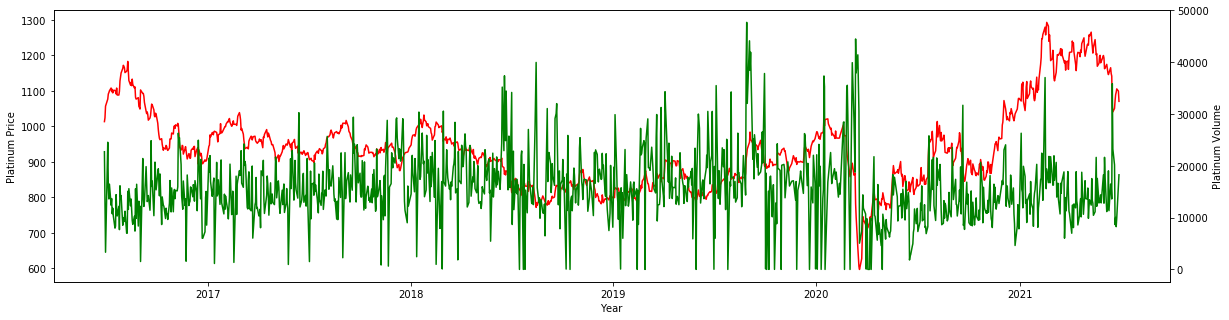

In [72]:
#precious_metals.rolling(window=21).std().plot(title='21-day Window', figsize=(20,10))


fig_platinum,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals['Platinum'], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Platinum Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals['Platinum Volume'],color="green")
ax2.set_ylabel("Platinum Volume")
plt.show()

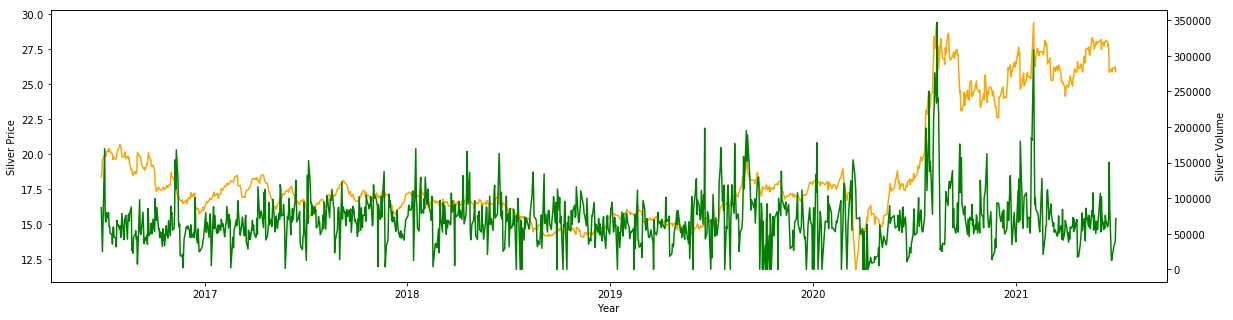

In [21]:
fig_silver,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals["Silver"], color="orange")
ax.set_xlabel("Year")
ax.set_ylabel("Silver Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals["Silver Volume"],color="green")
ax2.set_ylabel("Silver Volume")
plt.show()

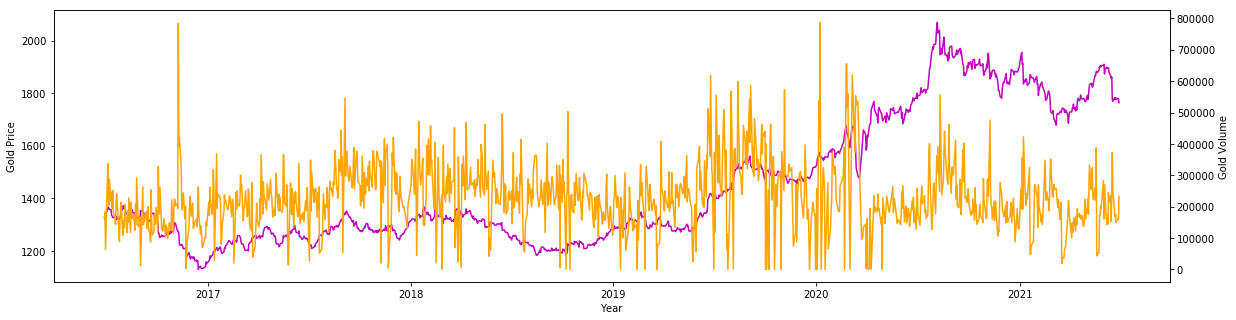

In [73]:
fig_gold,ax = plt.subplots(figsize=(20,5))
ax.plot(precious_metals.index, precious_metals['Gold'], color="m")
ax.set_xlabel("Year")
ax.set_ylabel("Gold Price")
ax2 = ax.twinx()
ax2.plot(precious_metals.index, precious_metals['Gold Volume'],color="orange")
ax2.set_ylabel("Gold Volume")
plt.show()

In [36]:
crude_oil_csv = Path = ('../practice_merge/crude_oil.csv')
crude_oil = pd.read_csv (crude_oil_csv, index_col ='Date', infer_datetime_format=True, parse_dates=True)
crude_oil.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-29,72.98,309029,72.78,73.81,71.97
2021-06-28,72.91,339373,73.99,74.45,72.62
2021-06-25,74.05,345181,73.32,74.18,72.85
2021-06-24,73.30,323860,73.28,73.61,72.32
2021-06-23,73.08,408067,72.91,74.25,72.82


In [37]:

heating_oil_csv = Path = ('../practice_merge/heating_oil.csv')
heating_oil = pd.read_csv (heating_oil_csv, index_col ='Date', infer_datetime_format=True, parse_dates=True)
heating_oil.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-29,2.1245,37530,2.1220,2.1512,2.1015
2021-06-28,2.1208,48629,2.1496,2.1582,2.1190
2021-06-25,2.1515,57922,2.1660,2.1780,2.0902
2021-06-24,2.1650,52750,2.1635,2.1683,2.1344
2021-06-23,2.1624,57053,2.1551,2.1916,2.1503


In [38]:
natural_gas_csv = Path = ('../practice_merge/natural_gas.csv')
natural_gas = pd.read_csv (natural_gas_csv, index_col ='Date', infer_datetime_format=True, parse_dates=True)
natural_gas.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-29,3.630,196638,3.583,3.811,3.571
2021-06-28,3.593,156940,3.525,3.653,3.505
2021-06-25,3.496,32794,3.425,3.511,3.415
2021-06-24,3.418,47829,3.316,3.442,3.301
2021-06-23,3.333,70154,3.257,3.383,3.250


In [39]:
all_energy_commodities = pd.concat([crude_oil, heating_oil, natural_gas] , axis="columns", join="inner")
all_energy_commodities.head()

,Close/Last,Volume,Open,High,Low,Close/Last,Volume,Open,High,Low,Close/Last,Volume,Open,High,Low
Date,,,,,,,,,,,,,,,
2021-06-29,72.98,309029,72.78,73.81,71.97,2.1245,37530,2.1220,2.1512,2.1015,3.630,196638,3.583,3.811,3.571
2021-06-28,72.91,339373,73.99,74.45,72.62,2.1208,48629,2.1496,2.1582,2.1190,3.593,156940,3.525,3.653,3.505
2021-06-25,74.05,345181,73.32,74.18,72.85,2.1515,57922,2.1660,2.1780,2.0902,3.496,32794,3.425,3.511,3.415
2021-06-24,73.30,323860,73.28,73.61,72.32,2.1650,52750,2.1635,2.1683,2.1344,3.418,47829,3.316,3.442,3.301
2021-06-23,73.08,408067,72.91,74.25,72.82,2.1624,57053,2.1551,2.1916,2.1503,3.333,70154,3.257,3.383,3.250


In [40]:
d = {'crude_oil' : crude_oil, 'heating_oil' : heating_oil, 'natural_gas' : natural_gas}
all_commodities= pd.concat(d.values(), axis=1, keys=d.keys())
all_commodities.head()

crude_oil                              heating_oil                 \
           Close/Last  Volume   Open   High    Low  Close/Last Volume    Open   
Date                                                                            
2021-06-29      72.98  309029  72.78  73.81  71.97      2.1245  37530  2.1220   
2021-06-28      72.91  339373  73.99  74.45  72.62      2.1208  48629  2.1496   
2021-06-25      74.05  345181  73.32  74.18  72.85      2.1515  57922  2.1660   
2021-06-24      73.30  323860  73.28  73.61  72.32      2.1650  52750  2.1635   
2021-06-23      73.08  408067  72.91  74.25  72.82      2.1624  57053  2.1551   

                           natural_gas                               
              High     Low  Close/Last  Volume   Open   High    Low  
Date                                                                 
2021-06-29  2.1512  2.1015       3.630  196638  3.583  3.811  3.571  
2021-06-28  2.1582  2.1190       3.593  156940  3.525  3.653  3.505  
2021-06-25  2.1780  2.0902       3.496   32794  3.425  3.511  3.415  
2021-06-24  2.1683  2.1344       3.418   47829  3.316  3.442  3.301  
2021-06-23  2.1916  2.1503       3.333   70154  3.257  3.383  3.250

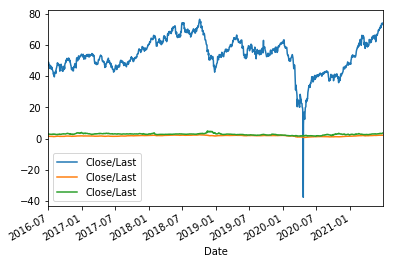

In [41]:
pd.DataFrame([all_commodities['crude_oil']['Close/Last'],all_commodities['heating_oil']['Close/Last'], all_commodities['natural_gas']['Close/Last']]).T.plot()

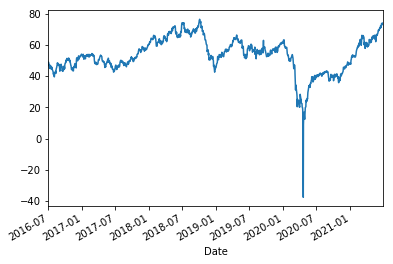

In [42]:
plt =all_commodities['crude_oil']['Close/Last'].plot()

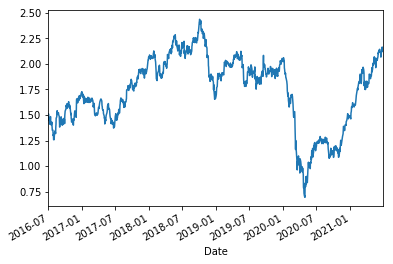

In [43]:
plt =all_commodities['heating_oil']['Close/Last'].plot()

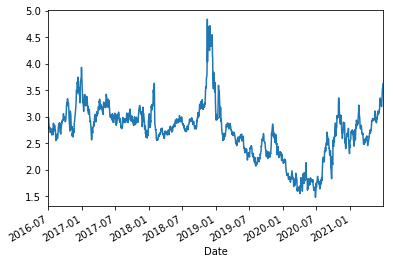

In [44]:
plt =all_commodities['natural_gas']['Close/Last'].plot()

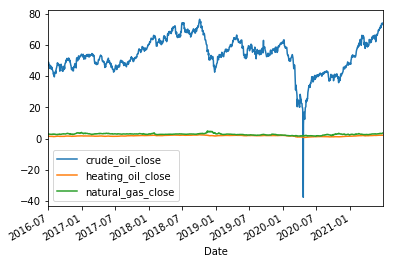

In [45]:
close_last = pd.DataFrame({'crude_oil_close': all_commodities['crude_oil']['Close/Last'],'heating_oil_close': all_commodities['heating_oil']['Close/Last'], 'natural_gas_close': all_commodities['natural_gas']['Close/Last']}).T

close_last.T.plot()

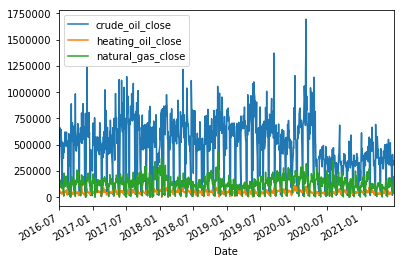

In [46]:
close_last_volume = pd.DataFrame({'crude_oil_close': all_commodities['crude_oil']['Volume'],'heating_oil_close': all_commodities['heating_oil']['Volume'], 'natural_gas_close': all_commodities['natural_gas']['Volume']})

close_last_volume.plot()

In [47]:
csvpath_corn=("../practice_merge/HistoricalData_corn(nasdaq).csv")
corn1_df = pd.read_csv(csvpath_corn, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
corn1_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-28,675.25,64989,637.75,676.50,636.75
2021-06-25,636.50,92335,653.25,659.50,634.00
2021-06-24,653.25,118774,664.00,664.00,650.75
2021-06-23,664.25,92037,660.50,666.25,659.25
2021-06-22,659.75,109273,662.75,668.00,653.75


In [48]:
csvpath_lumber=("../practice_merge/HistoricalData_lumber(nasdaq).csv")
lumber1_df = pd.read_csv(csvpath_lumber, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
lumber1_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-28,797.3,483.0,774.0,805.0,721.9
2021-06-25,774.0,318.0,834.5,834.5,774.0
2021-06-24,837.0,280.0,883.7,917.2,837.0
2021-06-23,879.0,190.0,866.8,900.5,859.8
2021-06-22,866.4,344.0,896.9,920.5,860.0


In [49]:
csvpath_palmoil=("../practice_merge/HistoricalData_soyabean.csv")
soyabean1_df = pd.read_csv(csvpath_palmoil, parse_dates=True, index_col="Date", infer_datetime_format=True)

#Display sample data
soyabean1_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-06-29,1310.25,79395.0,1325.25,1327.00,1298.00
2021-06-28,1312.50,94655.0,1269.75,1319.00,1267.00
2021-06-25,1269.75,108519.0,1290.75,1304.50,1259.75
2021-06-24,1291.75,103723.0,1298.75,1299.75,1261.75
2021-06-23,1300.25,78840.0,1300.25,1311.75,1293.75


In [50]:
print ("Corn (ZC) commodity has {} observations & {} features".format(*corn1_df.shape))
print ("Lumber (LBS) commodity has {} observations & {} features".format(*lumber1_df.shape))
print ("Soya bean (ZS) commodity has {} observations & {} features".format(*soyabean1_df.shape))

Corn (ZC) commodity has 1258 observations & 5 features
Lumber (LBS) commodity has 1258 observations & 5 features
Soya bean (ZS) commodity has 1259 observations & 5 features


In [51]:
corn1_df.isnull().sum()
lumber1_df.isnull().sum()
soyabean1_df.isnull().sum()

Close/Last    0
Volume        2
Open          0
High          0
Low           0
dtype: int64

In [52]:
corn1_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,388.065580,125021.364070,387.892886,391.743839,384.385135
std,77.829565,85467.437117,77.543080,79.236690,75.973554
min,301.500000,28.000000,302.000000,307.250000,300.250000
25%,349.500000,74206.500000,349.250000,352.000000,346.500000
50%,366.750000,126116.500000,366.875000,370.000000,364.375000
75%,387.000000,175820.750000,386.750000,389.500000,384.187500
max,772.750000,482695.000000,766.750000,775.000000,756.750000


In [53]:
lumber1_df.describe()

,Close/Last,Volume,Open,High,Low
count,1258.000000,1236.000000,1258.000000,1258.000000,1258.000000
mean,476.787838,428.346278,476.730207,483.824245,469.940700
std,223.607012,213.100751,223.884069,228.483282,219.019631
min,259.800000,2.000000,260.400000,265.600000,251.500000
25%,348.525000,269.750000,349.825000,354.625000,343.725000
50%,391.250000,396.500000,391.150000,396.650000,386.600000
75%,512.400000,537.250000,510.875000,517.875000,505.750000
max,1670.500000,1677.000000,1710.500000,1733.500000,1618.700000


In [54]:
soyabean1_df.describe()

,Close/Last,Volume,Open,High,Low
count,1259.000000,1257.000000,1259.000000,1259.000000,1259.000000
mean,996.412828,105646.690533,996.427720,1004.874305,988.796068
std,162.190286,35021.451268,162.057537,164.389817,159.851299
min,802.500000,5386.000000,805.000000,807.000000,791.000000
25%,895.000000,81342.000000,895.500000,900.000000,888.375000
50%,954.250000,98871.000000,953.750000,961.250000,946.500000
75%,1024.250000,121942.000000,1024.125000,1034.750000,1015.250000
max,1642.500000,327585.000000,1621.000000,1667.500000,1615.250000


In [55]:
corn1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-06-28 to 2016-06-29
Data columns (total 5 columns):
Close/Last    1258 non-null float64
Volume        1258 non-null int64
Open          1258 non-null float64
High          1258 non-null float64
Low           1258 non-null float64
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [56]:
lumber1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2021-06-28 to 2016-06-29
Data columns (total 5 columns):
Close/Last    1258 non-null float64
Volume        1236 non-null float64
Open          1258 non-null float64
High          1258 non-null float64
Low           1258 non-null float64
dtypes: float64(5)
memory usage: 59.0 KB


In [57]:
soyabean1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2021-06-29 to 2016-06-29
Data columns (total 5 columns):
Close/Last    1259 non-null float64
Volume        1257 non-null float64
Open          1259 non-null float64
High          1259 non-null float64
Low           1259 non-null float64
dtypes: float64(5)
memory usage: 59.0 KB


In [58]:
corn_df = []
lumber_df =[]
soyabean_df =[]

# Slicing data into the new dataframe
corn_df = corn1_df[['Close/Last', 'Volume']]
lumber_df = lumber1_df[['Close/Last', 'Volume']]
soyabean_df = soyabean1_df[['Close/Last', 'Volume']]

# Display sample
soyabean_df.tail(5)

,Close/Last,Volume
Date,,
2016-07-06,1073.25,166641.0
2016-07-05,1077.25,153685.0
2016-07-01,1137.50,103691.0
2016-06-30,1153.25,219688.0
2016-06-29,1112.50,98054.0


In [69]:
# Join the Corn database, Lumber database and Soya base database into a single datafram using 'concat' 
agriculture_df = pd.concat([corn_df, lumber_df, soyabean_df], axis=1, sort=True) 

#display sample data
agriculture_df.head()

,Close/Last,Volume,Close/Last,Volume,Close/Last,Volume
Date,,,,,,
2016-06-29,372.75,87901.0,307.7,217.0,1112.50,98054.0
2016-06-30,358.75,35074.0,307.7,265.0,1153.25,219688.0
2016-07-01,353.00,6565.0,315.0,393.0,1137.50,103691.0
2016-07-05,344.00,4662.0,322.8,905.0,1077.25,153685.0
2016-07-06,335.75,4133.0,321.6,463.0,1073.25,166641.0


In [60]:
# Assigning approprate new column names 
columns = ('Corn (ZC)', 'Corn_Vol', 'Lumber (LBS)', 'Lumber_Vol','Soya_bean (ZS)','Soya_bean_Vol')
agriculture_df.columns = columns

# Sorting the new database in Index column (Date)
agriculture_df.sort_index(inplace=True)

agriculture_df.head()

,Corn (ZC),Corn_Vol,Lumber (LBS),Lumber_Vol,Soya_bean (ZS),Soya_bean_Vol
Date,,,,,,
2016-06-29,372.75,87901.0,307.7,217.0,1112.50,98054.0
2016-06-30,358.75,35074.0,307.7,265.0,1153.25,219688.0
2016-07-01,353.00,6565.0,315.0,393.0,1137.50,103691.0
2016-07-05,344.00,4662.0,322.8,905.0,1077.25,153685.0
2016-07-06,335.75,4133.0,321.6,463.0,1073.25,166641.0


In [61]:
agri_price_df = agriculture_df[['Corn (ZC)', 'Lumber (LBS)', 'Soya_bean (ZS)']]
agri_price_df

,Corn (ZC),Lumber (LBS),Soya_bean (ZS)
Date,,,
2016-06-29,372.75,307.7,1112.50
2016-06-30,358.75,307.7,1153.25
2016-07-01,353.00,315.0,1137.50
2016-07-05,344.00,322.8,1077.25
2016-07-06,335.75,321.6,1073.25
2016-07-07,335.50,318.8,1024.75
2016-07-08,349.75,319.2,1057.75
2016-07-11,343.75,322.2,1055.00
2016-07-12,349.75,324.5,1087.00


In [62]:
agri_price_df.sort_index(inplace=True)

In [63]:
agri_vol_df = agriculture_df[['Corn_Vol','Lumber_Vol','Soya_bean_Vol']]

In [64]:
fig_agri_price = agri_price_df.hvplot(title='Price of Agricultural commodities (Corn, Lumber, Soya bean)', 
                   rot=90,
                   width = 750,
                    height = 400,
                   figsize=(15,10)
                  )

fig_agri_price  

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [76]:
# Data verification from main database  
agriculture_df.head()

,Close/Last,Volume,Close/Last,Volume,Close/Last,Volume
Date,,,,,,
2016-06-29,372.75,87901.0,307.7,217.0,1112.50,98054.0
2016-06-30,358.75,35074.0,307.7,265.0,1153.25,219688.0
2016-07-01,353.00,6565.0,315.0,393.0,1137.50,103691.0
2016-07-05,344.00,4662.0,322.8,905.0,1077.25,153685.0
2016-07-06,335.75,4133.0,321.6,463.0,1073.25,166641.0


KeyError: 'Corn (ZC)'

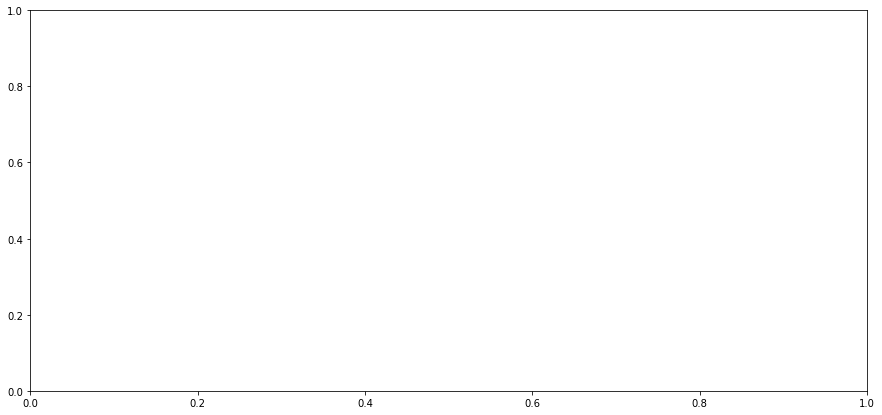

In [110]:
# Plotting Corn price and volume on two indices
fig_corn,ax = plt.subplots(figsize=(15,7))
ax.plot(agriculture_df.index, agriculture_df['Corn (ZC)'], color="teal")
ax.set_xlabel("Year")
ax.set_ylabel("Corn Price")
ax.set_title("Five year trend of Price-Volume on Corn Market")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Corn_Vol'],color="violet")
ax2.set_ylabel("Corn Volume")


KeyError: 'Lumber (LBS)'

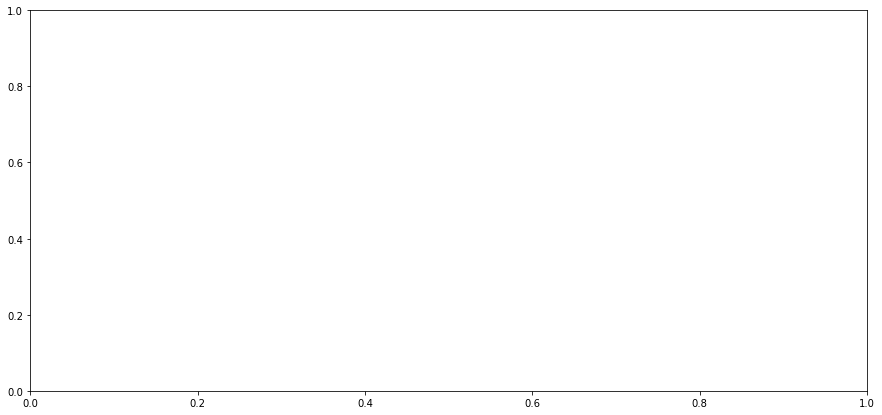

In [111]:
fig_lumber,ax = plt.subplots(figsize=(15,7))
ax.plot(agriculture_df.index, agriculture_df['Lumber (LBS)'], color="yellow")
ax.set_xlabel("Year")
ax.set_ylabel("Lumber Price")
ax.set_title("Five year trend of Price-Volume on Lumber Market")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Lumber_Vol'],color="blue")
ax2.set_ylabel("Lumber Volume")


KeyError: 'Soya_bean (ZS)'

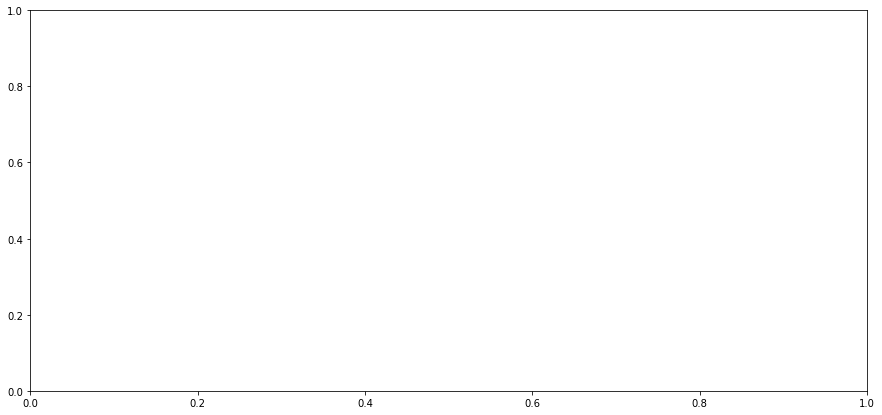

In [112]:
# Plotting Soya_bean price and volume on two indices
fig_soya,ax = plt.subplots(figsize=(15,7))
ax.plot(agriculture_df.index, agriculture_df['Soya_bean (ZS)'], color="lime")
ax.set_xlabel("Year")
ax.set_ylabel("Soya_bean Price")
ax.set_title("Five year trend of Price-Volume on Soybean Market")
ax2 = ax.twinx()
ax2.plot(agriculture_df.index, agriculture_df['Soya_bean_Vol'],color="aqua")
ax2.set_ylabel("Soya_bean Volume")

In [82]:
# Daily returns
daily_returns_agri_price = agri_price_df.pct_change()
daily_returns_agri_price.head()


,Corn (ZC),Lumber (LBS),Soya_bean (ZS)
Date,,,
2016-06-29,NaN,NaN,NaN
2016-06-30,-0.037559,0.000000,0.036629
2016-07-01,-0.016028,0.023724,-0.013657
2016-07-05,-0.025496,0.024762,-0.052967
2016-07-06,-0.023983,-0.003717,-0.003713


In [83]:
moving_avg_agri = daily_returns_agri_price.rolling(window=30).mean()

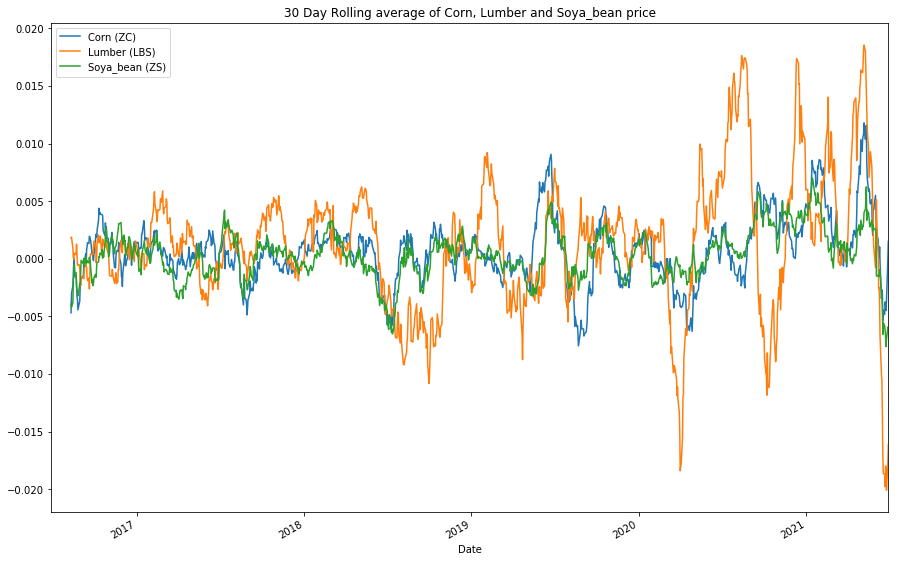

In [84]:
moving_avg_agri.plot(figsize=(15,10), title='30 Day Rolling average of Corn, Lumber and Soya_bean price')

In [85]:
#agri_price_df.groupby(pd.Grouper(key='Date',freq='M')).mean()
agri_price_by_year = agri_price_df.groupby([agri_price_df.index.year]).first()
agri_price_by_year

,Corn (ZC),Lumber (LBS),Soya_bean (ZS)
Date,,,
2016,372.75,307.7,1112.50
2017,355.75,329.1,995.00
2018,353.25,449.5,964.75
2019,375.75,333.2,907.00
2020,391.50,431.8,956.25
2021,483.75,700.6,1313.00


In [86]:
#Plotting Price by year
plot = agri_price_by_year.hvplot.bar(rot=90, width=700, height = 600).opts(yformatter="%.0f")
plot

:Bars   [Date,Variable]   (value)

In [87]:
# Read Vaccination csv data
csvpath_vaccine=("../practice_merge/share-people-fully-vaccinated-covid.csv")
vaccine_data_df = pd.read_csv(csvpath_vaccine, parse_dates=True, index_col="Day", infer_datetime_format=True)
vaccine_data_df.head(5)

,Entity,Code,people_fully_vaccinated_per_hundred,145609-annotations
Day,,,,
2021-05-11,Afghanistan,AFG,0.14,NaN
2021-05-20,Afghanistan,AFG,0.20,NaN
2021-05-24,Afghanistan,AFG,0.25,NaN
2021-05-26,Afghanistan,AFG,0.29,NaN
2021-05-27,Afghanistan,AFG,0.29,NaN


In [88]:
# Dropping column '145609-annotations'
vaccine_data_df = vaccine_data_df.drop(columns=['145609-annotations'])
vaccine_data_df

,Entity,Code,people_fully_vaccinated_per_hundred
Day,,,
2021-05-11,Afghanistan,AFG,0.14
2021-05-20,Afghanistan,AFG,0.20
2021-05-24,Afghanistan,AFG,0.25
2021-05-26,Afghanistan,AFG,0.29
2021-05-27,Afghanistan,AFG,0.29
2021-05-30,Afghanistan,AFG,0.31
2021-06-02,Afghanistan,AFG,0.37
2021-06-03,Afghanistan,AFG,0.38
2021-06-08,Afghanistan,AFG,0.41


In [89]:
# Assigning column names
columns = ('Country', 'Country Code', 'People Vaccinated per 100')
vaccine_data_df.columns = columns
vaccine_data_df.head()

,Country,Country Code,People Vaccinated per 100
Day,,,
2021-05-11,Afghanistan,AFG,0.14
2021-05-20,Afghanistan,AFG,0.20
2021-05-24,Afghanistan,AFG,0.25
2021-05-26,Afghanistan,AFG,0.29
2021-05-27,Afghanistan,AFG,0.29


In [90]:
# Vaccine Data by country
plot = vaccine_data_df.hvplot.bar(groupby='Country', rot=90, width=700, height = 600).opts(yformatter="%.0f")
plot

:DynamicMap   [Country]
   :Bars   [Day]   (People Vaccinated per 100)

In [91]:
vaccine_by_mth1 = vaccine_data_df.groupby([vaccine_data_df['Country'], vaccine_data_df.index.year, vaccine_data_df.index.month]).mean()
vaccine_by_mth1.index.names = ['Country', 'Year', 'Month']
vaccine_by_mth1.reset_index(inplace=True)
vaccine_by_mth1.head()

,Country,Year,Month,People Vaccinated per 100
0,Afghanistan,2021,5,0.246667
1,Afghanistan,2021,6,0.435714
2,Africa,2021,2,0.003750
3,Africa,2021,3,0.150968
4,Africa,2021,4,0.340000


In [92]:
# Replace Month value with string discription
vaccine_by_mth = vaccine_by_mth1.replace({'Month': {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"}})
vaccine_by_mth.head()

,Country,Year,Month,People Vaccinated per 100
0,Afghanistan,2021,May,0.246667
1,Afghanistan,2021,Jun,0.435714
2,Africa,2021,Feb,0.003750
3,Africa,2021,Mar,0.150968
4,Africa,2021,Apr,0.340000


In [93]:
# Sortin the datafram
vaccine_by_mth.sort_values(by='People Vaccinated per 100').head()

,Country,Year,Month,People Vaccinated per 100
228,Faeroe Islands,2021,Jan,0.0
743,Ukraine,2021,Apr,0.0
742,Ukraine,2021,Mar,0.0
786,World,2020,Dec,0.0
444,Malaysia,2021,Feb,0.0


In [94]:
# Datafram slicing for recodes with data and soring 
vaccine_by_mth2 = []
vaccine_by_mth2 = vaccine_by_mth.loc[(vaccine_by_mth!=0).all(1)]
vaccine_by_mth2.sort_values(by='People Vaccinated per 100')

,Country,Year,Month,People Vaccinated per 100
761,Upper middle income,2021,Jan,0.001176
169,Democratic Republic of Congo,2021,Jun,0.002000
105,Cambodia,2021,Feb,0.002500
426,Low income,2021,Apr,0.003103
2,Africa,2021,Feb,0.003750
548,Oceania,2021,Feb,0.004000
289,Guatemala,2021,Mar,0.004000
336,Indonesia,2021,Jan,0.005000
741,Uganda,2021,May,0.006667
676,South America,2021,Jan,0.007368


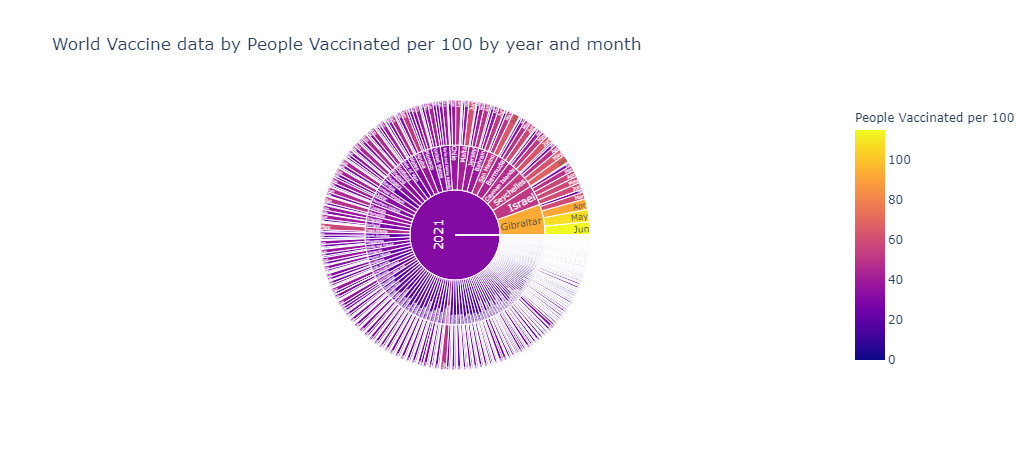

In [95]:
### Vaccine data by 2021 month 
vaccine_world = px.sunburst(vaccine_by_mth2, 
                  path=['Year','Country','Month'], 
                  values='People Vaccinated per 100',
                  color='People Vaccinated per 100', 
                  title = "World Vaccine data by People Vaccinated per 100 by year and month"
                  
                 )
vaccine_world.show()

In [96]:
# Reading market data - industrial metals
al_path = Path("../practice_merge/Aluminium.csv")
al = pd.read_csv(al_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()
co_path = Path("../practice_merge/Copper.csv")
co = pd.read_csv(co_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()
pa_path = Path("../practice_merge/Palladium.csv")
pa = pd.read_csv(pa_path, parse_dates = True, index_col="Date", infer_datetime_format = True).dropna()

In [97]:
# Creating individual data frames 
al_data = al[["Close/Last", "Volume"]].dropna()
co_data = co[["Close/Last", "Volume"]].dropna()
pa_data = pa[["Close/Last", "Volume"]].dropna()

In [98]:
# Merging data bases
industrial_metals = pd.concat([al_data, co_data, pa_data] , axis = 1)
col = ('AL_price', 'AL_vol', 'CO_price', 'CO_vol', 'PA_price', 'PA_vol')
industrial_metals.columns = col
industrial_metals.head(5)

,AL_price,AL_vol,CO_price,CO_vol,PA_price,PA_vol
Date,,,,,,
2016-07-05,NaN,NaN,2.1835,107837,602.65,6697.0
2016-07-06,NaN,NaN,2.1535,69044,607.55,4213.0
2016-07-07,NaN,NaN,2.1235,52331,612.35,3570.0
2016-07-08,NaN,NaN,2.1190,43312,617.10,4464.0
2016-07-11,NaN,NaN,2.1475,50976,625.75,4000.0


In [99]:
# Creating data separate data frames
industrial_metals_price = industrial_metals[["AL_price", "CO_price", "PA_price"]]
industrial_metals_vol = industrial_metals[["AL_vol", "CO_vol", "PA_vol"]]

In [100]:
# Reading GDP data
gdp_per_capita_path = Path("GDP_per_capita.csv")
gdp_per_capita_original = pd.read_csv(gdp_per_capita_path, index_col = 'Country Code')
gdp_per_capita_original.head(2)
gdp_per_capita = (gdp_per_capita_original[["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]).dropna()
gdp_per_capita.head(3)

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
AFE,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
AFG,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913,493.756581,507.103392,508.808409
AFW,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800


In [101]:
# Graph Analysis
industrial_metals_vol.head(4)

,AL_vol,CO_vol,PA_vol
Date,,,
2016-07-05,NaN,107837,6697.0
2016-07-06,NaN,69044,4213.0
2016-07-07,NaN,52331,3570.0
2016-07-08,NaN,43312,4464.0


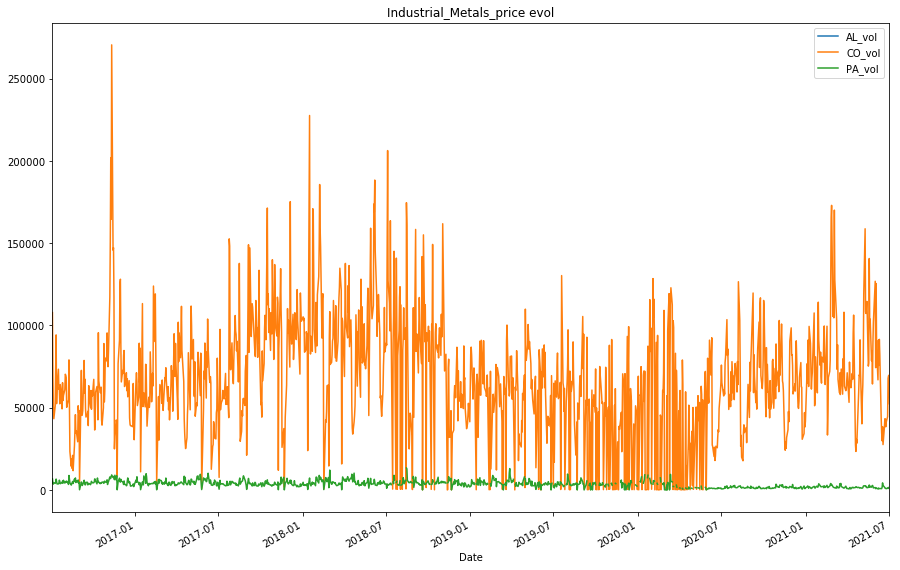

In [102]:
industrial_metals_vol.plot(title = "Industrial_Metals_price evol", figsize = (15,10))

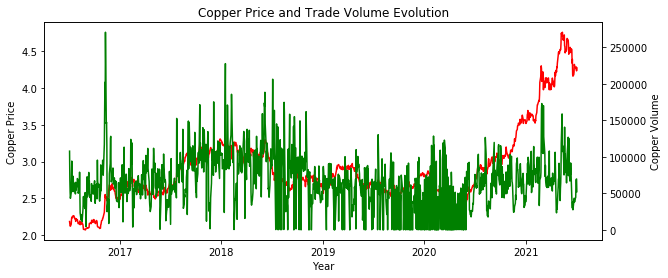

In [103]:
## Market Analysis - Copper 

fig_copper,ax = plt.subplots(figsize=(10,4))
ax.plot(co_data.index,co_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Copper Price")
ax.set_title("Copper Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(co_data.index, co_data["Volume"],color="green")
ax2.set_ylabel("Copper Volume")
plt.show()

In [104]:
# GDP trend main Copper producers in the world - Chile, China, Peru, US 
co_exporters = gdp_per_capita.loc[['CHN', 'CHL', 'PER', 'WLD']]
co_exporters.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
CHN,5618.132267,6316.918318,7050.646271,7678.599486,8066.942635,8147.937705,8879.438667,9976.677137,10216.630330,10500.39562
CHL,14637.233440,15351.540740,15842.936480,14670.988910,13574.169240,13753.592150,14998.817060,15888.144360,14741.714400,13231.70421
PER,5869.323882,6528.971775,6756.752996,6672.877373,6229.100674,6204.996457,6710.507602,6957.793411,7027.612207,6126.87454
WLD,10493.169850,10606.357620,10783.681240,10951.690610,10251.020480,10294.189710,10834.344340,11372.727330,11417.174060,10925.74607


In [105]:
co_exporters = co_exporters.T
co_exporters

Country Code,CHN,CHL,PER,WLD
2011,5618.132267,14637.23344,5869.323882,10493.16985
2012,6316.918318,15351.54074,6528.971775,10606.35762
2013,7050.646271,15842.93648,6756.752996,10783.68124
2014,7678.599486,14670.98891,6672.877373,10951.69061
2015,8066.942635,13574.16924,6229.100674,10251.02048
2016,8147.937705,13753.59215,6204.996457,10294.18971
2017,8879.438667,14998.81706,6710.507602,10834.34434
2018,9976.677137,15888.14436,6957.793411,11372.72733
2019,10216.630330,14741.71440,7027.612207,11417.17406
2020,10500.395620,13231.70421,6126.874540,10925.74607


In [106]:
co_exporters.shape
co_exporters.head()

Country Code,CHN,CHL,PER,WLD
2011,5618.132267,14637.23344,5869.323882,10493.16985
2012,6316.918318,15351.54074,6528.971775,10606.35762
2013,7050.646271,15842.93648,6756.752996,10783.68124
2014,7678.599486,14670.98891,6672.877373,10951.69061
2015,8066.942635,13574.16924,6229.100674,10251.02048


In [107]:
plot_co_exporters = co_exporters.hvplot.line(title = "Copper Exporting Countries - GDP per Capita")
plot_co_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [114]:
# Covid vaccination on Copper producing countries

vaccine_df_2 = vaccine.set_index(['Entity']).drop(columns=['Month'])
vaccine_co = vaccine_df_2.loc[['China', 'Chile', 'Peru']]
vaccine_co.head(20)

AttributeError: 'WindowsPath' object has no attribute 'set_index'

In [115]:
plot_vaccine_co = vaccine_co.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Copper Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_co

NameError: name 'vaccine_co' is not defined

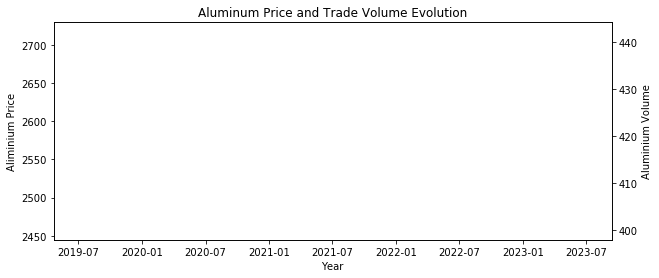

In [116]:
## Market Analysis - Aluminium

fig_aluminum,ax = plt.subplots(figsize=(10,4))
ax.plot(al_data.index,al_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Aliminium Price")
ax.set_title("Aluminum Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(al_data.index, al_data["Volume"],color="green")
ax2.set_ylabel("Aluminium Volume")
plt.show()

In [117]:
# GDP trend main Aluminium producers in the world - Chile, China, Peru, US 
al_exporters = gdp_per_capita.loc[['CHN', 'IND', 'RUS', 'WLD']]
al_exporters.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
CHN,5618.132267,6316.918318,7050.646271,7678.599486,8066.942635,8147.937705,8879.438667,9976.677137,10216.630330,10500.39562
IND,1458.104066,1443.882435,1449.610451,1573.885642,1605.605445,1732.554242,1980.667020,1996.915087,2100.751461,1900.70681
RUS,14311.084320,15420.874540,15974.644630,14095.648740,9313.013625,8704.898413,10720.332660,11287.355280,11497.649250,10126.72179
WLD,10493.169850,10606.357620,10783.681240,10951.690610,10251.020480,10294.189710,10834.344340,11372.727330,11417.174060,10925.74607


In [118]:
al_exporters = al_exporters.T
al_exporters

Country Code,CHN,IND,RUS,WLD
2011,5618.132267,1458.104066,14311.084320,10493.16985
2012,6316.918318,1443.882435,15420.874540,10606.35762
2013,7050.646271,1449.610451,15974.644630,10783.68124
2014,7678.599486,1573.885642,14095.648740,10951.69061
2015,8066.942635,1605.605445,9313.013625,10251.02048
2016,8147.937705,1732.554242,8704.898413,10294.18971
2017,8879.438667,1980.667020,10720.332660,10834.34434
2018,9976.677137,1996.915087,11287.355280,11372.72733
2019,10216.630330,2100.751461,11497.649250,11417.17406
2020,10500.395620,1900.706810,10126.721790,10925.74607


In [119]:
al_exporters.shape
al_exporters.head()

Country Code,CHN,IND,RUS,WLD
2011,5618.132267,1458.104066,14311.084320,10493.16985
2012,6316.918318,1443.882435,15420.874540,10606.35762
2013,7050.646271,1449.610451,15974.644630,10783.68124
2014,7678.599486,1573.885642,14095.648740,10951.69061
2015,8066.942635,1605.605445,9313.013625,10251.02048


In [120]:
plot_al_exporters = al_exporters.hvplot.line(title = "Aluminium Exporting Countries - GDP per Capita")
plot_al_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [121]:
# Covid vaccination on Aluminium producing countries

vaccine_df_2 = vaccine.set_index(['Entity']).drop(columns=['Month'])
vaccine_al = vaccine_df_2.loc[['China', 'Russia', 'India']]
vaccine_al.head()

AttributeError: 'WindowsPath' object has no attribute 'set_index'

In [122]:
plot_vaccine_al = vaccine_al.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Aluminium Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_al

NameError: name 'vaccine_al' is not defined

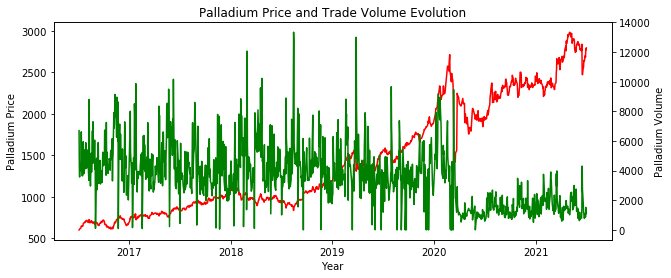

In [123]:
## Market Analysis - Palladium

fig_palladium,ax = plt.subplots(figsize=(10,4))
ax.plot(pa_data.index,pa_data["Close/Last"], color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Palladium Price")
ax.set_title("Palladium Price and Trade Volume Evolution")
ax2 = ax.twinx()
ax2.plot(pa_data.index, pa_data["Volume"],color="green")
ax2.set_ylabel("Palladium Volume")
plt.show()

In [124]:
# GDP trend main Palladium producers in the world 
pa_exporters = gdp_per_capita.loc[['USA', 'ZAF', 'RUS', 'CAN', 'WLD']]
pa_exporters.head()

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Code,,,,,,,,,,
USA,49882.558130,51602.931050,53106.536770,55049.988330,56863.371500,58021.400500,60109.65573,63064.418410,65279.529030,63543.577790
ZAF,8007.476439,7501.661096,6832.725546,6433.400402,5734.633422,5272.543648,6131.47945,6372.605655,6001.401121,5090.715025
RUS,14311.084320,15420.874540,15974.644630,14095.648740,9313.013625,8704.898413,10720.33266,11287.355280,11497.649250,10126.721790
CAN,52223.696110,52669.089960,52635.174960,50955.998320,43596.135540,42315.603710,45129.35644,46453.901870,46326.672640,43241.617830
WLD,10493.169850,10606.357620,10783.681240,10951.690610,10251.020480,10294.189710,10834.34434,11372.727330,11417.174060,10925.746070


In [125]:
pa_exporters = pa_exporters.T
pa_exporters

Country Code,USA,ZAF,RUS,CAN,WLD
2011,49882.55813,8007.476439,14311.084320,52223.69611,10493.16985
2012,51602.93105,7501.661096,15420.874540,52669.08996,10606.35762
2013,53106.53677,6832.725546,15974.644630,52635.17496,10783.68124
2014,55049.98833,6433.400402,14095.648740,50955.99832,10951.69061
2015,56863.37150,5734.633422,9313.013625,43596.13554,10251.02048
2016,58021.40050,5272.543648,8704.898413,42315.60371,10294.18971
2017,60109.65573,6131.479450,10720.332660,45129.35644,10834.34434
2018,63064.41841,6372.605655,11287.355280,46453.90187,11372.72733
2019,65279.52903,6001.401121,11497.649250,46326.67264,11417.17406
2020,63543.57779,5090.715025,10126.721790,43241.61783,10925.74607


In [126]:
plot_pa_exporters = pa_exporters.hvplot.line(title = "Palladium Exporting Countries - GDP per Capita")
plot_pa_exporters

:NdOverlay   [Country Code]
   :Curve   [index]   (value)

In [127]:
# Covid vaccination on Palladium producing countries

vaccine_df_2 = vaccine.set_index(['Entity']).drop(columns=['Month'])
vaccine_pa = vaccine_df_2.loc[['Canada', 'Russia', 'United States', 'South Africa']]
vaccine_pa.head()

AttributeError: 'WindowsPath' object has no attribute 'set_index'

In [128]:
plot_vaccine_pa = vaccine_pa.hvplot.bar(
    xlabel = "Country", 
    ylabel = "% Fully Vaccinated People", 
    title = "Palladium Producing Countries Vaccine Evolution",
    rot = 90, height =500)
plot_vaccine_pa

NameError: name 'vaccine_pa' is not defined

In [129]:
# Read csv historical data for Corn (ZC)
csvpath_gdp=('../practice_merge/gdp_per_capita.csv')
#gdp_df = pd.read_csv(csvpath_gdp, parse_dates=True, index_col="Discovery Date", infer_datetime_format=True)
gdp1_df = pd.read_csv(csvpath_gdp)

In [130]:
#Display sample data
gdp1_df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020,30253.279360,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP per capita (current US$),NY.GDP.PCAP.CD,127.651518,130.353643,134.693838,142.159769,150.881897,161.073294,...,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
2,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,58.458009,78.706429,82.095307,101.108325,...,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,AFW,GDP per capita (current US$),NY.GDP.PCAP.CD,107.963779,113.114697,118.865837,123.478967,131.892939,138.566819,...,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


In [131]:
# Data slicing for GDP related to 2011 to 2020 
gdp_df = []
gdp_df = gdp1_df[['Country Name','2011' , '2012' ,'2013' ,'2014' ,'2015' ,'2016' ,'2017' ,'2018' ,'2019' ,'2020']]
#gdp_df = gdp1_df[['Country Name', 'Country Code']]

In [132]:
# Reading sample data
gdp_df.head()

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,24985.013920,24712.493260,26441.619940,26893.011510,28396.908420,28452.170610,29350.805020,30253.279360,NaN,NaN
1,Africa Eastern and Southern,1682.287263,1667.992618,1648.867514,1654.314865,1503.859334,1401.281053,1536.206783,1530.161917,1481.425292,1326.663658
2,Afghanistan,591.162798,641.871438,637.165464,613.856505,578.466353,509.220101,519.888913,493.756581,507.103392,508.808409
3,Africa Western and Central,1827.518347,1936.390962,2123.392433,2166.743309,1886.248158,1666.422406,1606.978332,1695.959215,1772.339155,1714.426800
4,Angola,4615.468219,5100.097027,5254.881126,5408.411700,4166.979833,3506.073128,4095.810057,3289.643995,2809.626088,1895.770869


In [133]:
# Reading GDP data in to a new DataFrame for Corn producing countries 
gdp_corn=[]
gdp_corn = gdp_df[(gdp_df["Country Name"] == "United States") 
                 |(gdp_df["Country Name"] == "China")
                 |(gdp_df["Country Name"] == "Brazil")
                 |(gdp_df["Country Name"] == "Argentina")
                 |(gdp_df["Country Name"] == "Ukraine")
                 |(gdp_df["Country Name"] == "India")
                 ]
           
gdp_corn

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,Argentina,12848.864200,13082.664330,13080.254730,12334.798250,13789.060420,12790.242470,14613.041820,11633.498010,9912.281809,8441.919439
29,Brazil,13245.612030,12370.024450,12300.324820,12112.587670,8814.001418,8710.096774,9928.643063,9151.445253,8897.487770,6796.844542
40,China,5618.132267,6316.918318,7050.646271,7678.599486,8066.942635,8147.937705,8879.438667,9976.677137,10216.630330,10500.395620
109,India,1458.104066,1443.882435,1449.610451,1573.885642,1605.605445,1732.554242,1980.667020,1996.915087,2100.751461,1900.706810
248,Ukraine,3569.758121,3855.417729,4029.711252,3104.643206,2124.662319,2187.730510,2640.675677,3096.817402,3662.563087,3726.927149
251,United States,49882.558130,51602.931050,53106.536770,55049.988330,56863.371500,58021.400500,60109.655730,63064.418410,65279.529030,63543.577790


In [134]:
# Transposing the datafram for rows and columns
corn_gdp1 = gdp_corn.transpose()
corn_gdp1

,9,29,40,109,248,251
Country Name,Argentina,Brazil,China,India,Ukraine,United States
2011,12848.9,13245.6,5618.13,1458.1,3569.76,49882.6
2012,13082.7,12370,6316.92,1443.88,3855.42,51602.9
2013,13080.3,12300.3,7050.65,1449.61,4029.71,53106.5
2014,12334.8,12112.6,7678.6,1573.89,3104.64,55050
2015,13789.1,8814,8066.94,1605.61,2124.66,56863.4
2016,12790.2,8710.1,8147.94,1732.55,2187.73,58021.4
2017,14613,9928.64,8879.44,1980.67,2640.68,60109.7
2018,11633.5,9151.45,9976.68,1996.92,3096.82,63064.4
2019,9912.28,8897.49,10216.6,2100.75,3662.56,65279.5


In [135]:
# Assigning column names
columns = ('Argentina', 'Brazil' , 'China', 'India', 'Ukraine', 'United States')
corn_gdp1.columns = columns
corn_gdp1

,Argentina,Brazil,China,India,Ukraine,United States
Country Name,Argentina,Brazil,China,India,Ukraine,United States
2011,12848.9,13245.6,5618.13,1458.1,3569.76,49882.6
2012,13082.7,12370,6316.92,1443.88,3855.42,51602.9
2013,13080.3,12300.3,7050.65,1449.61,4029.71,53106.5
2014,12334.8,12112.6,7678.6,1573.89,3104.64,55050
2015,13789.1,8814,8066.94,1605.61,2124.66,56863.4
2016,12790.2,8710.1,8147.94,1732.55,2187.73,58021.4
2017,14613,9928.64,8879.44,1980.67,2640.68,60109.7
2018,11633.5,9151.45,9976.68,1996.92,3096.82,63064.4
2019,9912.28,8897.49,10216.6,2100.75,3662.56,65279.5


In [136]:
# Dropping the row with 'Country Name'
corn_gdp2 = corn_gdp1.drop(index='Country Name')
corn_gdp2

,Argentina,Brazil,China,India,Ukraine,United States
2011,12848.9,13245.6,5618.13,1458.1,3569.76,49882.6
2012,13082.7,12370,6316.92,1443.88,3855.42,51602.9
2013,13080.3,12300.3,7050.65,1449.61,4029.71,53106.5
2014,12334.8,12112.6,7678.6,1573.89,3104.64,55050
2015,13789.1,8814,8066.94,1605.61,2124.66,56863.4
2016,12790.2,8710.1,8147.94,1732.55,2187.73,58021.4
2017,14613,9928.64,8879.44,1980.67,2640.68,60109.7
2018,11633.5,9151.45,9976.68,1996.92,3096.82,63064.4
2019,9912.28,8897.49,10216.6,2100.75,3662.56,65279.5
2020,8441.92,6796.84,10500.4,1900.71,3726.93,63543.6


In [137]:
# Plotting GDP data fro top 6 countries producing Corn
plot_corn = corn_gdp2.hvplot.line(title = 'GDP of top 6 Corn producing countries',rot=90)
plot_corn

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [138]:
# Reading GDP data in to a new DataFrame for Corn producing countries 
gdp_lumber=[]
gdp_lumber = gdp_df[(gdp_df["Country Name"] == "United States") 
                 |(gdp_df["Country Name"] == "China")
                 |(gdp_df["Country Name"] == "Brazil")
                 |(gdp_df["Country Name"] == "Russian Federation")
                 |(gdp_df["Country Name"] == "Canada")
                 |(gdp_df["Country Name"] == "India")
                 ]
                 
gdp_lumber

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
29,Brazil,13245.612030,12370.024450,12300.324820,12112.587670,8814.001418,8710.096774,9928.643063,9151.445253,8897.487770,6796.844542
35,Canada,52223.696110,52669.089960,52635.174960,50955.998320,43596.135540,42315.603710,45129.356440,46453.901870,46326.672640,43241.617830
40,China,5618.132267,6316.918318,7050.646271,7678.599486,8066.942635,8147.937705,8879.438667,9976.677137,10216.630330,10500.395620
109,India,1458.104066,1443.882435,1449.610451,1573.885642,1605.605445,1732.554242,1980.667020,1996.915087,2100.751461,1900.706810
202,Russian Federation,14311.084320,15420.874540,15974.644630,14095.648740,9313.013625,8704.898413,10720.332660,11287.355280,11497.649250,10126.721790
251,United States,49882.558130,51602.931050,53106.536770,55049.988330,56863.371500,58021.400500,60109.655730,63064.418410,65279.529030,63543.577790


In [139]:
# Transposing the datafram for rows and columns
lumber_gdp1 = gdp_lumber.transpose()
lumber_gdp1

,29,35,40,109,202,251
Country Name,Brazil,Canada,China,India,Russian Federation,United States
2011,13245.6,52223.7,5618.13,1458.1,14311.1,49882.6
2012,12370,52669.1,6316.92,1443.88,15420.9,51602.9
2013,12300.3,52635.2,7050.65,1449.61,15974.6,53106.5
2014,12112.6,50956,7678.6,1573.89,14095.6,55050
2015,8814,43596.1,8066.94,1605.61,9313.01,56863.4
2016,8710.1,42315.6,8147.94,1732.55,8704.9,58021.4
2017,9928.64,45129.4,8879.44,1980.67,10720.3,60109.7
2018,9151.45,46453.9,9976.68,1996.92,11287.4,63064.4
2019,8897.49,46326.7,10216.6,2100.75,11497.6,65279.5


In [140]:
# Assigning column names
columns = ('Brazil' ,' Canada', 'China', 'India', 'Russia', 'United States')
lumber_gdp1.columns = columns
lumber_gdp1

,Brazil,Canada,China,India,Russia,United States
Country Name,Brazil,Canada,China,India,Russian Federation,United States
2011,13245.6,52223.7,5618.13,1458.1,14311.1,49882.6
2012,12370,52669.1,6316.92,1443.88,15420.9,51602.9
2013,12300.3,52635.2,7050.65,1449.61,15974.6,53106.5
2014,12112.6,50956,7678.6,1573.89,14095.6,55050
2015,8814,43596.1,8066.94,1605.61,9313.01,56863.4
2016,8710.1,42315.6,8147.94,1732.55,8704.9,58021.4
2017,9928.64,45129.4,8879.44,1980.67,10720.3,60109.7
2018,9151.45,46453.9,9976.68,1996.92,11287.4,63064.4
2019,8897.49,46326.7,10216.6,2100.75,11497.6,65279.5


In [141]:
# Dropping the row with 'Country Name'
lumber_gdp2 = lumber_gdp1.drop(index='Country Name')
lumber_gdp2

,Brazil,Canada,China,India,Russia,United States
2011,13245.6,52223.7,5618.13,1458.1,14311.1,49882.6
2012,12370,52669.1,6316.92,1443.88,15420.9,51602.9
2013,12300.3,52635.2,7050.65,1449.61,15974.6,53106.5
2014,12112.6,50956,7678.6,1573.89,14095.6,55050
2015,8814,43596.1,8066.94,1605.61,9313.01,56863.4
2016,8710.1,42315.6,8147.94,1732.55,8704.9,58021.4
2017,9928.64,45129.4,8879.44,1980.67,10720.3,60109.7
2018,9151.45,46453.9,9976.68,1996.92,11287.4,63064.4
2019,8897.49,46326.7,10216.6,2100.75,11497.6,65279.5
2020,6796.84,43241.6,10500.4,1900.71,10126.7,63543.6


In [142]:
# Plotting GDP data fro top 6 countries producing Lumber
plot_lumber = lumber_gdp2.hvplot.line(title='GDP for top 6 Lumber producing countries', rot=90)
plot_lumber

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [143]:
# Reading GDP data in to a new DataFrame for Soybean producing countries 
gdp_soybean=[]
gdp_soybean = gdp_df[(gdp_df["Country Name"] == "United States") 
                 |(gdp_df["Country Name"] == "China")
                 |(gdp_df["Country Name"] == "Brazil")
                 |(gdp_df["Country Name"] == "Argentina")
                 |(gdp_df["Country Name"] == "Paraguay")
                 |(gdp_df["Country Name"] == "India")
                 ]
                 
gdp_soybean

,Country Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,Argentina,12848.864200,13082.664330,13080.254730,12334.798250,13789.060420,12790.242470,14613.041820,11633.498010,9912.281809,8441.919439
29,Brazil,13245.612030,12370.024450,12300.324820,12112.587670,8814.001418,8710.096774,9928.643063,9151.445253,8897.487770,6796.844542
40,China,5618.132267,6316.918318,7050.646271,7678.599486,8066.942635,8147.937705,8879.438667,9976.677137,10216.630330,10500.395620
109,India,1458.104066,1443.882435,1449.610451,1573.885642,1605.605445,1732.554242,1980.667020,1996.915087,2100.751461,1900.706810
195,Paraguay,5329.387437,5185.141549,5936.975959,6118.318110,5413.776021,5324.609068,5678.869972,5782.784550,5380.963322,4949.749700
251,United States,49882.558130,51602.931050,53106.536770,55049.988330,56863.371500,58021.400500,60109.655730,63064.418410,65279.529030,63543.577790


In [144]:
# Transposing the datafram for rows and columns
soybean_gdp1 = gdp_soybean.transpose()
soybean_gdp1

,9,29,40,109,195,251
Country Name,Argentina,Brazil,China,India,Paraguay,United States
2011,12848.9,13245.6,5618.13,1458.1,5329.39,49882.6
2012,13082.7,12370,6316.92,1443.88,5185.14,51602.9
2013,13080.3,12300.3,7050.65,1449.61,5936.98,53106.5
2014,12334.8,12112.6,7678.6,1573.89,6118.32,55050
2015,13789.1,8814,8066.94,1605.61,5413.78,56863.4
2016,12790.2,8710.1,8147.94,1732.55,5324.61,58021.4
2017,14613,9928.64,8879.44,1980.67,5678.87,60109.7
2018,11633.5,9151.45,9976.68,1996.92,5782.78,63064.4
2019,9912.28,8897.49,10216.6,2100.75,5380.96,65279.5


In [145]:
# Assigning column names
columns = ('Argentina', 'Brazil' , 'China', 'India', 'Paraguay', 'United States')
soybean_gdp1.columns = columns
soybean_gdp1

,Argentina,Brazil,China,India,Paraguay,United States
Country Name,Argentina,Brazil,China,India,Paraguay,United States
2011,12848.9,13245.6,5618.13,1458.1,5329.39,49882.6
2012,13082.7,12370,6316.92,1443.88,5185.14,51602.9
2013,13080.3,12300.3,7050.65,1449.61,5936.98,53106.5
2014,12334.8,12112.6,7678.6,1573.89,6118.32,55050
2015,13789.1,8814,8066.94,1605.61,5413.78,56863.4
2016,12790.2,8710.1,8147.94,1732.55,5324.61,58021.4
2017,14613,9928.64,8879.44,1980.67,5678.87,60109.7
2018,11633.5,9151.45,9976.68,1996.92,5782.78,63064.4
2019,9912.28,8897.49,10216.6,2100.75,5380.96,65279.5


In [146]:
# Dropping the row with 'Country Name'
soybean_gdp2 = soybean_gdp1.drop(index='Country Name')
soybean_gdp2

,Argentina,Brazil,China,India,Paraguay,United States
2011,12848.9,13245.6,5618.13,1458.1,5329.39,49882.6
2012,13082.7,12370,6316.92,1443.88,5185.14,51602.9
2013,13080.3,12300.3,7050.65,1449.61,5936.98,53106.5
2014,12334.8,12112.6,7678.6,1573.89,6118.32,55050
2015,13789.1,8814,8066.94,1605.61,5413.78,56863.4
2016,12790.2,8710.1,8147.94,1732.55,5324.61,58021.4
2017,14613,9928.64,8879.44,1980.67,5678.87,60109.7
2018,11633.5,9151.45,9976.68,1996.92,5782.78,63064.4
2019,9912.28,8897.49,10216.6,2100.75,5380.96,65279.5
2020,8441.92,6796.84,10500.4,1900.71,4949.75,63543.6


In [147]:
# Plotting GDP data fro top 6 countries producing Soybean
plot_soybean = soybean_gdp2.hvplot.line(rot=90)
plot_soybean

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [157]:
# Reading MApboc API to variable
load_dotenv(find_dotenv())
map_box_api = os.getenv("MAP_BOX_API")

In [158]:
# Setting Mapbox key
px.set_mapbox_access_token(map_box_api)

In [159]:
# Checking for API key
type(map_box_api)

NoneType

In [160]:
# Checking for API key
type(map_box_api)

NoneType

In [161]:
# Read csv historical data for Corn (ZC)
csvpath_fire=("../practice_merge/BC_wildfire-new.csv")
fire_df = pd.read_csv(csvpath_fire, parse_dates=True, index_col="Discovery Date", infer_datetime_format=True)

#Display sample data
fire_df.head()

,Fire No.,Geographic,Hectares,Latitude,Longitude,Latitude.1,Longitude.1
Discovery Date,,,,,,,
2021-06-20,V10859,Eleven Mile Creek,42,49° 19.438,121° 16.983,50.53,-124.00
2021-07-03,V11341,Skowkona,1.9,53° 18.925,132° 07.264,55.87,-132.85
2021-07-04,V31386,Pemberton Portage Road,0.23,50° 31.377,122° 29.797,51.56,-124.70
2021-07-05,V31497,Wade Creek,0.1,50° 33.117,122° 25.728,50.88,-124.44
2021-06-27,V50948,Daniels River,2.5,50° 16.057,124° 23.893,50.43,-126.86


In [162]:
# Checking for nulls
fire_df.isnull().sum()

Fire No.       0
Geographic     0
Hectares       0
Latitude       0
Longitude      0
Latitude.1     0
Longitude.1    0
dtype: int64

In [163]:
# Dropping NA's
fire_df.dropna(inplace=True)

In [164]:
# Reading sample data
fire_df.head()

,Fire No.,Geographic,Hectares,Latitude,Longitude,Latitude.1,Longitude.1
Discovery Date,,,,,,,
2021-06-20,V10859,Eleven Mile Creek,42,49° 19.438,121° 16.983,50.53,-124.00
2021-07-03,V11341,Skowkona,1.9,53° 18.925,132° 07.264,55.87,-132.85
2021-07-04,V31386,Pemberton Portage Road,0.23,50° 31.377,122° 29.797,51.56,-124.70
2021-07-05,V31497,Wade Creek,0.1,50° 33.117,122° 25.728,50.88,-124.44
2021-06-27,V50948,Daniels River,2.5,50° 16.057,124° 23.893,50.43,-126.86


In [165]:
# Checking for null's
fire_df.isnull().sum()

Fire No.       0
Geographic     0
Hectares       0
Latitude       0
Longitude      0
Latitude.1     0
Longitude.1    0
dtype: int64

In [166]:
# Display dataframe information
fire_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 150 entries, 2021-06-20 to 2021-07-04
Data columns (total 7 columns):
Fire No.       150 non-null object
Geographic     150 non-null object
Hectares       150 non-null object
Latitude       150 non-null object
Longitude      150 non-null object
Latitude.1     150 non-null float64
Longitude.1    150 non-null float64
dtypes: float64(2), object(5)
memory usage: 9.4+ KB


In [167]:
# Displaying sample data
fire_df.sort_values(by='Geographic').tail(15)

,Fire No.,Geographic,Hectares,Latitude,Longitude,Latitude.1,Longitude.1
Discovery Date,,,,,,,
2021-07-02,K41283,Trap Creek,15.2,50° 07.710,118° 25.280,52.09,-119.19
2021-07-04,K41384,Tsuius Creek,1.1,50° 36.200,118° 34.330,51.16,-119.48
2021-07-02,G71324,Twidell Creek,0.5,55° 01.061,121° 51.400,55.19,-122.96
2021-07-02,N51317,Van Houten Creek,0.02,49° 40.005,118° 06.742,49.68,-120.16
2021-06-29,K51032,W of Darke Lake,0.3,49° 42.893,119° 52.262,52.18,-120.59
2021-07-02,K21239,W of Droppingwater Creek,0.5,50° 26.915,120° 21.767,52.98,-122.48
2021-07-01,C41191,W of Succour Lake,350,51° 54.344,120° 50.487,52.86,-122.19
2021-07-05,V31497,Wade Creek,0.1,50° 33.117,122° 25.728,50.88,-124.44
2021-07-05,K71497,Wade Creek,0.1,50° 33.728,122° 26.822,52.57,-124.72


In [168]:
# Data cleanup, removing ',' 
fire_df['Hectares'] = fire_df['Hectares'].str.replace(',', '')

In [169]:
# Converting Datatype to numberic 
fire_df["Hectares"] = pd.to_numeric(fire_df["Hectares"])

In [170]:
# Checking for data types of the fields
fire_df.dtypes

Fire No.        object
Geographic      object
Hectares       float64
Latitude        object
Longitude       object
Latitude.1     float64
Longitude.1    float64
dtype: object

In [171]:
# Sorting Dataframe by Longitude to see if there are any zero's
fire_df.sort_values(by='Longitude')

,Fire No.,Geographic,Hectares,Latitude,Longitude,Latitude.1,Longitude.1
Discovery Date,,,,,,,
2021-07-02,N21319,Dry Creek North,5.00,50° 16.302,115° 42.903,51.11,-118.21
2021-07-03,N21376,E side of Fairmont Mtn,0.01,50° 19.160,115° 44.893,50.76,-118.21
2021-07-02,N21307,Bear Creek,1.50,50° 31.215,115° 45.998,51.11,-118.52
2021-07-02,N11286,Moyie River,19.00,49° 22.962,116° 02.360,52.04,-117.03
2021-07-01,N11215,Bootleg,0.36,49° 39.590,116° 06.823,51.29,-118.39
2021-07-03,N21360,Granite Creek - Modifed Response,40.00,50° 03.975,116° 22.713,52.76,-118.35
2021-07-02,N11282,Redding Creek # 2,0.80,49° 36.445,116° 35.047,50.84,-116.71
2021-07-02,N71245,Cultus Creek- Modified Response,50.00,49° 18.975,116° 52.879,52.01,-119.31
2021-07-04,N71379,Woodbury Creek,0.26,49° 49.021,116° 55.495,49.88,-118.29


In [172]:
map_plot = px.scatter_mapbox(
    fire_df,
    lat = "Latitude",
    lon = "Longitude",
    color = "Hectares",
    size = "Hectares",
    color_continuous_scale=px.colors.diverging.Temps,
    hover_name = "Geographic",
    zoom=9
)
map_plot.show()

TypeError: Could not convert 49° 19.43853° 18.92550° 31.37750° 33.11750° 16.05750° 15.57854° 23.78156° 47.47058° 07.95857° 52.00753° 30.02754° 46.46054° 46.85853° 35.97255° 04.35855° 23.35055° 47.29056° 23.23055° 06.12056° 17.36056° 21.46056° 47.22055° 14.03954° 46.34954° 56.59655° 01.06157° 29.83057° 08.57058° 51.93558° 51.00059° 19.09257° 47.74059° 43.87159° 11.82759° 25.90459° 33.45359° 49.41558° 58.12557° 36.76950° 54.26950° 39.80450° 37.56350° 45.01350° 26.91551° 33.07151° 37.94551° 38.63450° 26.81650° 31.02250° 42.12350° 41.86450° 48.25350° 43.89850° 34.30251° 25.63451° 20.23250° 43.65250° 44.78251° 48.07251° 04.94150° 49.95250° 32.62750° 43.20950° 00.84050° 07.71050° 03.12750° 32.82750° 36.20049° 43.84849° 42.89349° 58.66749° 55.23249° 43.07049° 11.04049° 04.39750° 10.65250° 53.44350° 12.38050° 13.86750° 43.98451° 02.45950° 33.72849° 39.59049° 36.44549° 22.96250° 31.21550° 16.30250° 03.97550° 19.16051° 22.78451° 35.28751° 41.14851° 15.90352° 02.56551° 37.06549° 16.90049° 40.00549° 20.90349° 38.55849° 18.97550° 35.38250° 42.64449° 49.02153° 21.36352° 38.71253° 02.94453° 17.16853° 15.96551° 25.80052° 16.10752° 35.87552° 18.65251° 28.49851° 33.24051° 28.16451° 28.52051° 12.74851° 45.55751° 34.75751° 34.12851° 33.50751° 54.36351° 49.73251° 41.49751° 33.91851° 42.23951° 47.40051° 38.54851° 38.75651° 39.71451° 48.35451° 55.98251° 38.49451° 39.22051° 40.52751° 54.34451° 29.30051° 40.88351° 55.07451° 59.16851° 14.53951° 15.25251° 25.46851° 27.40451° 14.68251° 58.88751° 26.23352° 03.23752° 29.18251° 56.563 to numeric

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
        [3] Matplotlib(Figure)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Matplotlib(Figure)
        [3] HoloViews(NdOverlay)
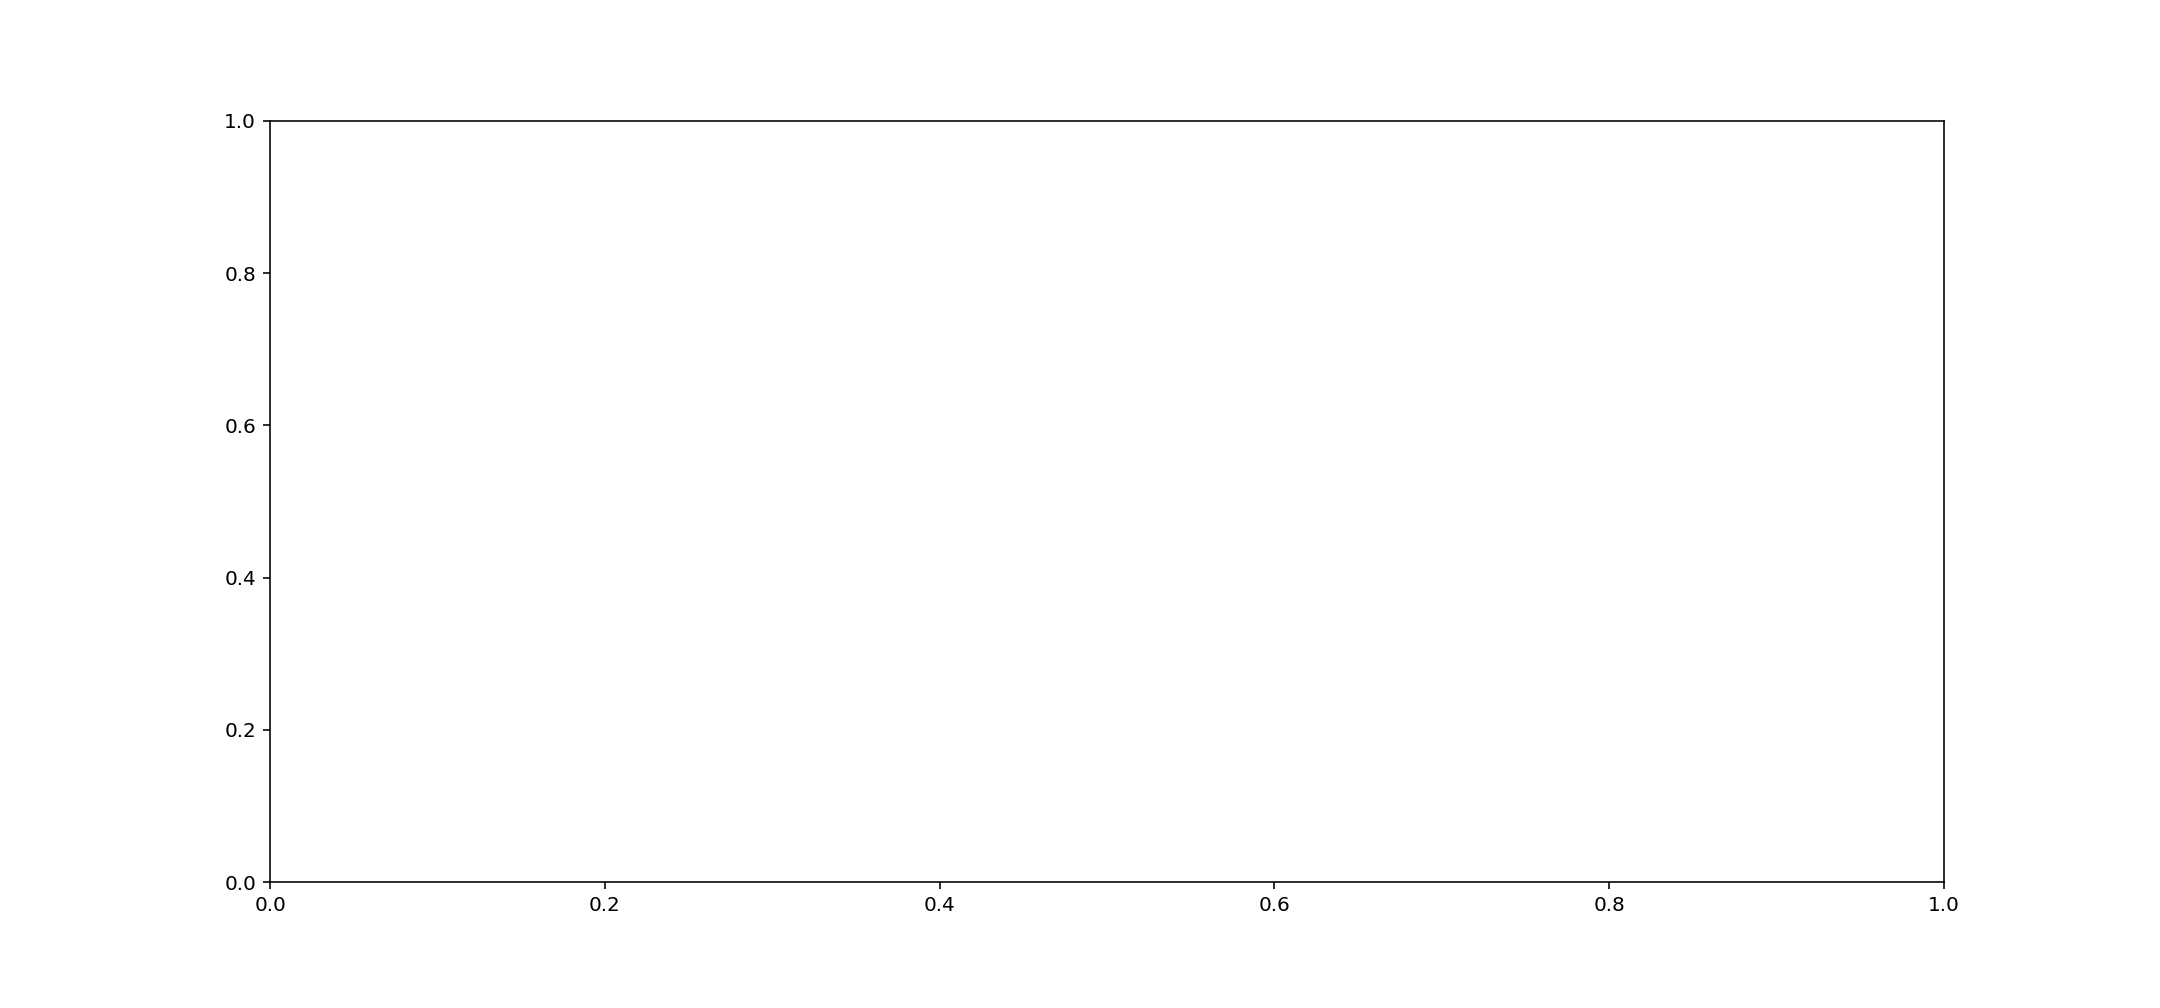
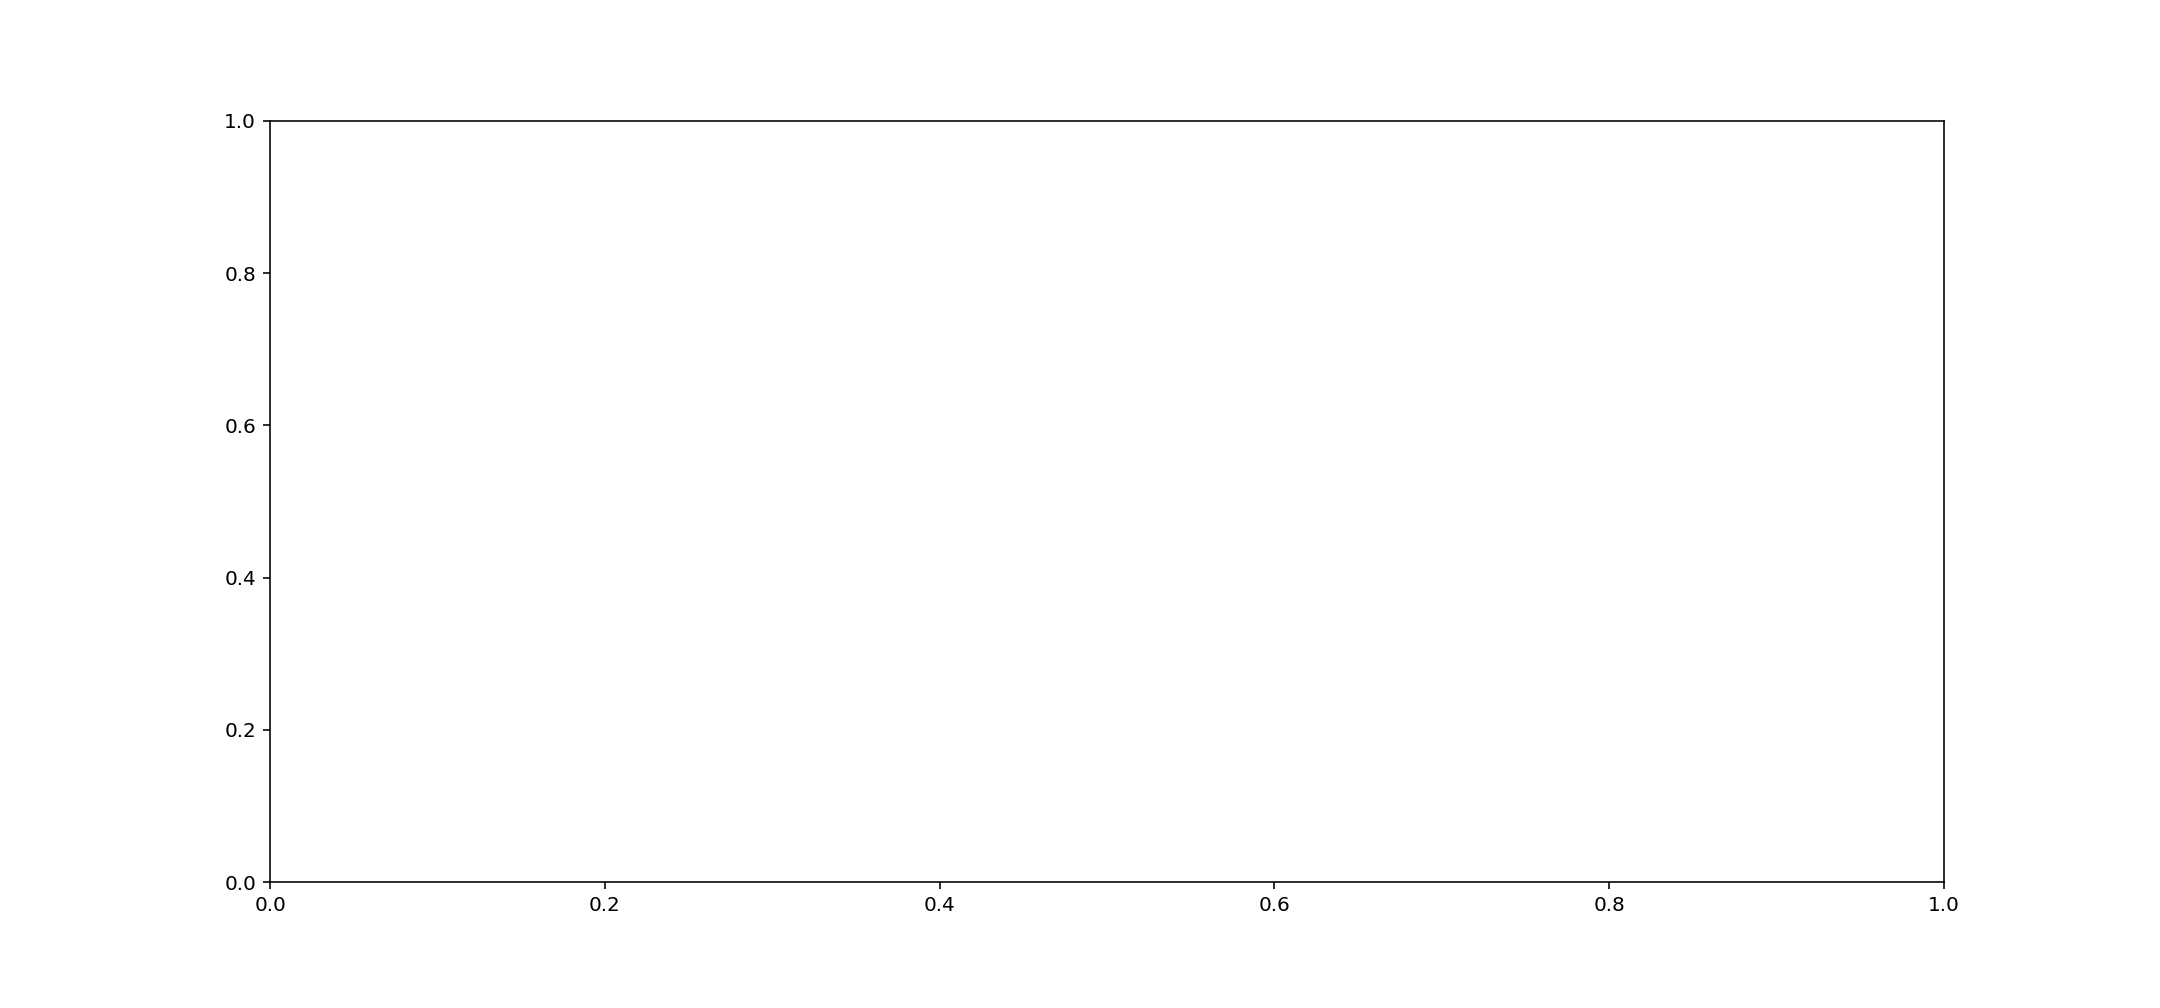
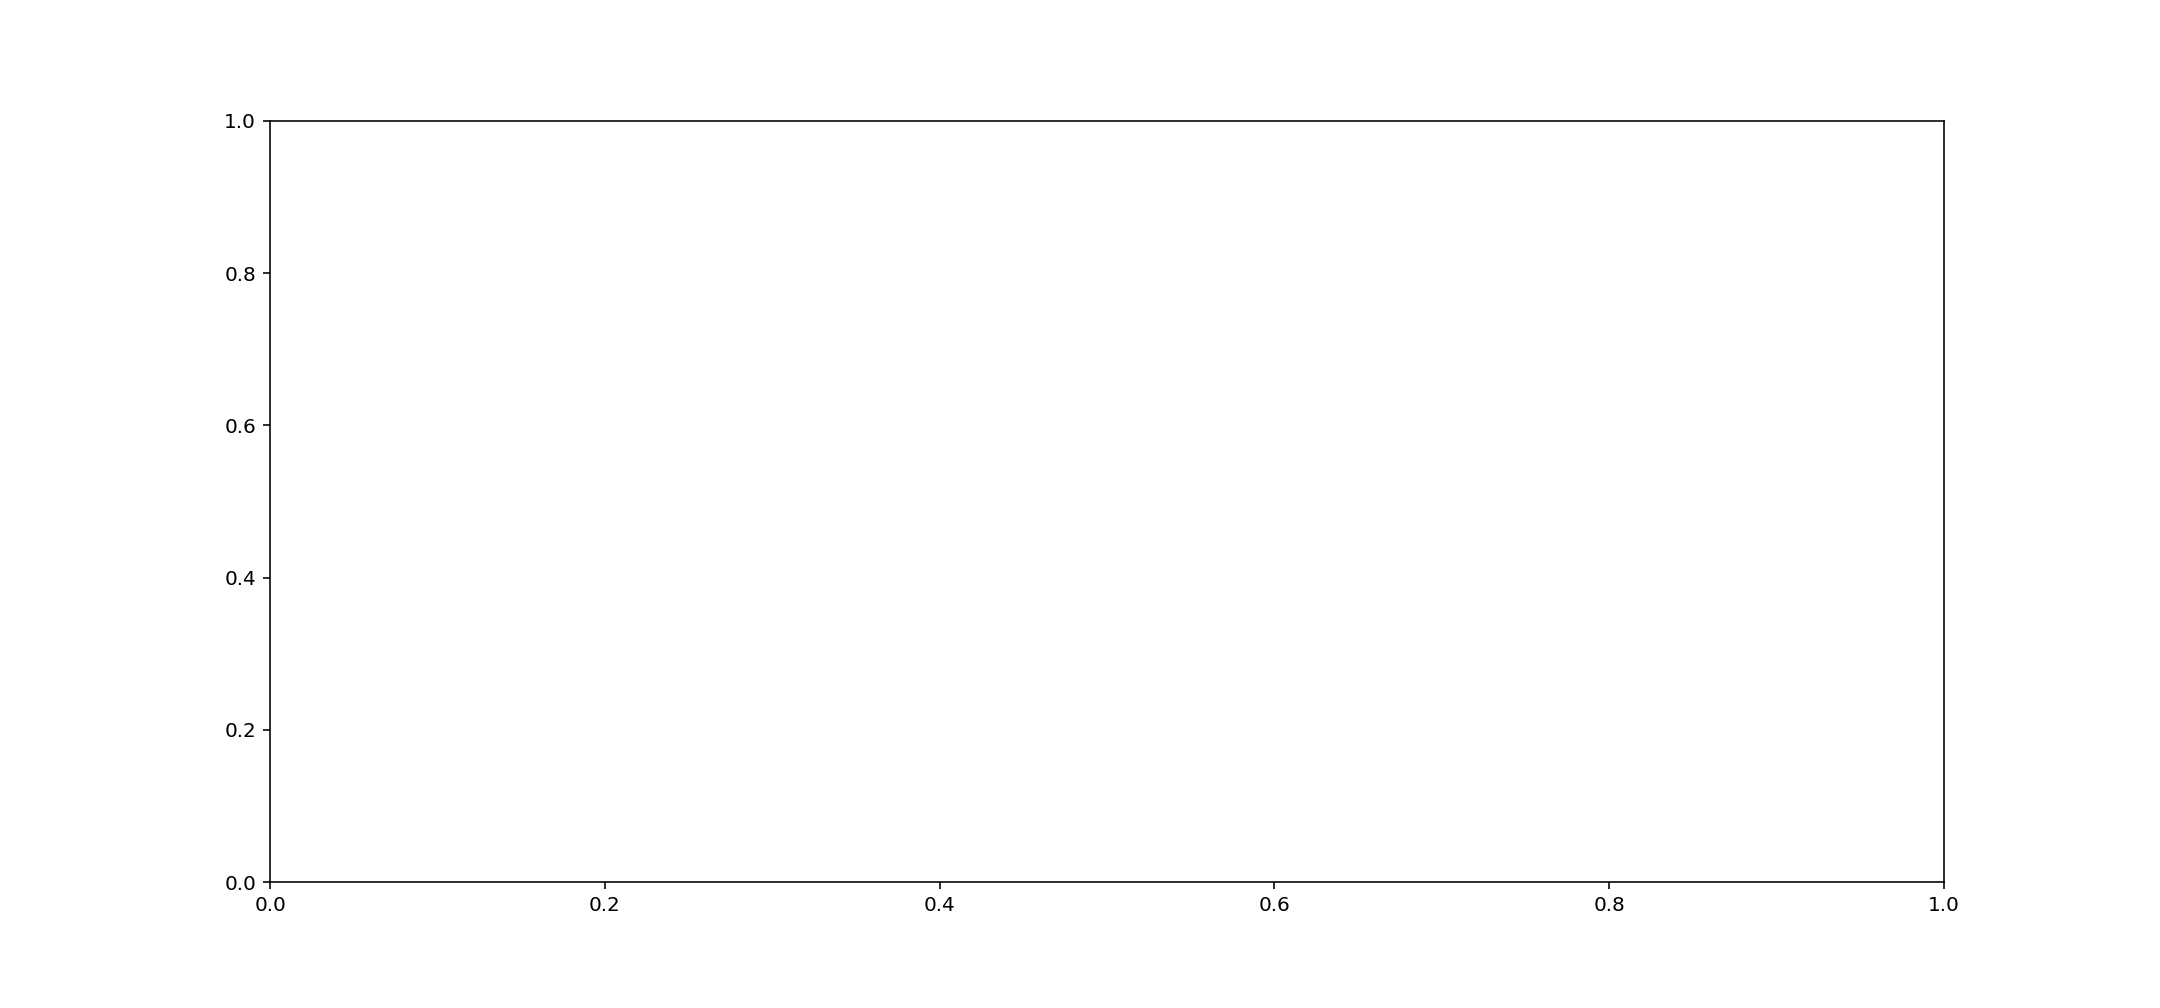

In [173]:
# Plotting corn and lumner in column (for tabs and panel)
price_vol_as_column1 = pn.Column(
    '# Price / Volume  ',
    '## Data on price and volume of Corn and lumber',
    fig_corn, fig_lumber
    )

# Plotting soya and price of commodities in column (for tabs and panel)
price_vol_as_column2 = pn.Column(
    '# Price / Volume ',
    '## Data on price and volume of Soya and price trend of all three commodities ',
    fig_soya, fig_agri_price
    )
# Plotting the column plots in a row
price_vol_row = pn.Row(price_vol_as_column1, price_vol_as_column2)
price_vol_row

In [174]:
# converting bar and line chart functions 

price_pn=pn.pane.Matplotlib(precious_metals, tight=True)
price_volume_pn=pn.pane.Matplotlib(all_metals, tight=True)
volume_pn=pn.pane.Matplotlib(metals, tight=True)


ValueError: Matplotlib pane does not support objects of type 'DataFrame'.

In [175]:
# create a Title for the Dashboard 
title= pn.pane.Markdown('Commodities and COVID..')

# Define a welcome text

welcome_text= pn.pane.Markdown(' In this Data Analysis we will explore how the Commodities Market was impacted during COVID-19 ')

#converting charts to create Dashboard
Welcome_text=pn.Column(welcome_text)
price_and_volume=pn.Row(price_pn,price_volume_pn,volume_pn)


NameError: name 'price_pn' is not defined